1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

N = 1000
x1 = np.random.normal(loc=0,scale=1,size=N)
x2 = x1 + np.random.normal(loc=0,scale=3,size=N)
x3 = 2*x1 + x2

A = np.array([x1,x2,x3])
C=np.cov(A)
l, V = la.eig(C)
print("The eigenvalues:\n", np.real_if_close(l), '\n')
print("The matrix of the eigenvectors:\n", V, '\n')

The eigenvalues:
 [ 2.77884211e+01 -1.42427933e-15  1.98914023e+00] 

The matrix of the eigenvectors:
 [[-0.11469356 -0.81649658  0.56584337]
 [-0.57832021 -0.40824829 -0.70631372]
 [-0.80770733  0.40824829  0.42537302]] 



In [2]:
#using SVD
U, S, Vt = np.linalg.svd(A)
l_svd = S**2/(N-1)
print(l_svd,"\nsame eigenvalues found above (if we consider the value beside e-14 as 0)\n")
V_svd = U
print(U,"\neigenvectors are the columns of the U matrix")

[2.78232841e+01 1.98917293e+00 1.08012572e-31] 
same eigenvalues found above (if we consider the value beside e-14 as 0)

[[-0.11471696  0.56583863 -0.81649658]
 [-0.578291   -0.70633764 -0.40824829]
 [-0.80772492  0.42533962  0.40824829]] 
eigenvectors are the columns of the U matrix


In [3]:
Lambda = np.diag(l_svd)
for i in range(len(l_svd)):
    variability = Lambda[i,i]/Lambda.trace() *100
    print("By selecting the component ",i+1,", we retain %.2f%% of the total variability" % (Lambda[i,i]/Lambda.trace()*100))
    
print("Component 3 is build using component 1 and 2 that's why it's scored 0%")
print("Component 2 is build using component 1 and a new random generated feature that's why it's scored poorely but better than 0%")

By selecting the component  1 , we retain 93.33% of the total variability
By selecting the component  2 , we retain 6.67% of the total variability
By selecting the component  3 , we retain 0.00% of the total variability
Component 3 is build using component 1 and 2 that's why it's scored 0%
Component 2 is build using component 1 and a new random generated feature that's why it's scored poorely but better than 0%


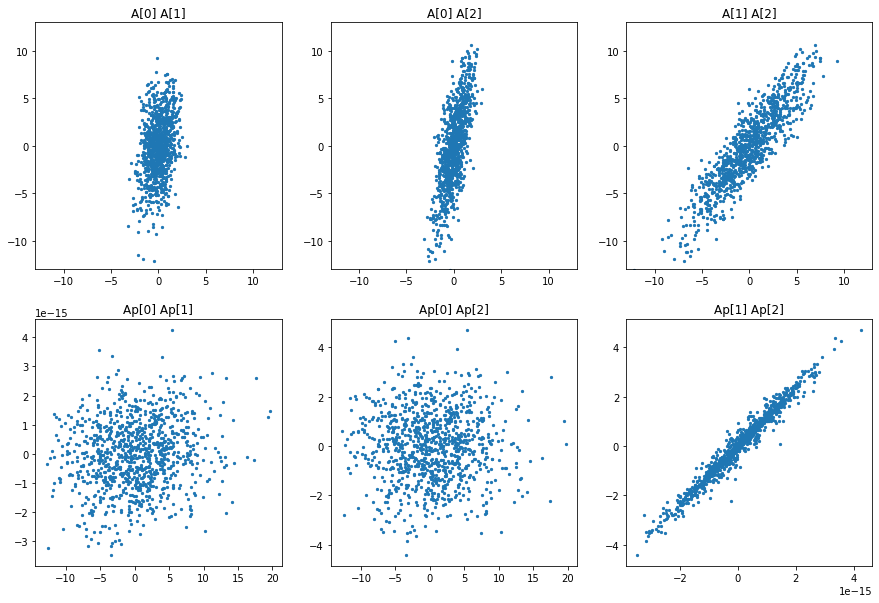

In [4]:
Ap = np.dot(V.T,A)

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(15,10))
scale_factor = 1

ax1.set_title('A[0] A[1]')
ax1.axis([-13, 13, -13, 13])
ax1.scatter(A[0,:], A[1,:], s=5)

ax2.set_title('A[0] A[2]')
ax2.axis([-13, 13, -13, 13])
ax2.scatter(A[0,:], A[2,:], s=5)

ax3.set_title('A[1] A[2]')
ax3.axis([-13, 13, -13, 13])
ax3.scatter(A[1,:], A[2,:], s=5)

ax4.set_title('Ap[0] Ap[1]')
ax4.scatter(Ap[0,:], Ap[1,:], s=5)

ax5.set_title('Ap[0] Ap[2]')
ax5.scatter(Ap[0,:], Ap[2,:], s=5)

ax6.set_title('Ap[1] Ap[2]')
ax6.scatter(Ap[1,:], Ap[2,:], s=5)

plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [5]:
noise = np.random.normal(loc=0,scale=1/20,size=(N,10)) #create nx10 noise matrix

#concatenate this matrix to the right of the matrix containing original data
old_A = A
A = np.hstack((A.T,noise))
A = A.T

In [6]:
C=np.cov(A)
l, V = la.eig(C)
print("The eigenvalues:\n", np.real_if_close(l), '\n')

The eigenvalues:
 [2.77884462e+01 1.98915638e+00 2.34920898e-16 2.96239802e-03
 2.81727025e-03 2.61680134e-03 2.53591986e-03 2.47612727e-03
 2.41836732e-03 2.38774711e-03 2.15842097e-03 2.24729249e-03
 2.21741822e-03] 



In [7]:
#using SVD
U, S, Vt = np.linalg.svd(A)
l_svd = S**2/(N-1)
print(l_svd,"\nsame eigenvalues found above (if we consider the value beside e-14 as 0)\n")

[2.78233088e+01 1.98918908e+00 2.96381473e-03 2.81773630e-03
 2.61796313e-03 2.53599917e-03 2.47722603e-03 2.41918919e-03
 2.38796051e-03 2.24737034e-03 2.21744473e-03 2.15911133e-03
 1.07432682e-31] 
same eigenvalues found above (if we consider the value beside e-14 as 0)



In [9]:
Lambda = np.diag(l_svd)
for i in range(len(l_svd)):
    variability = Lambda[i,i]/Lambda.trace() *100
    print("By selecting the component ",i+1,", we retain %.2f%% of the total variability" % (Lambda[i,i]/Lambda.trace()*100))
    
print("Because the new componants have a standard deviation much smaller they represent a small variability")

By selecting the component  1 , we retain 93.25% of the total variability
By selecting the component  2 , we retain 6.67% of the total variability
By selecting the component  3 , we retain 0.01% of the total variability
By selecting the component  4 , we retain 0.01% of the total variability
By selecting the component  5 , we retain 0.01% of the total variability
By selecting the component  6 , we retain 0.01% of the total variability
By selecting the component  7 , we retain 0.01% of the total variability
By selecting the component  8 , we retain 0.01% of the total variability
By selecting the component  9 , we retain 0.01% of the total variability
By selecting the component  10 , we retain 0.01% of the total variability
By selecting the component  11 , we retain 0.01% of the total variability
By selecting the component  12 , we retain 0.01% of the total variability
By selecting the component  13 , we retain 0.00% of the total variability
Because the new componants have a standard dev

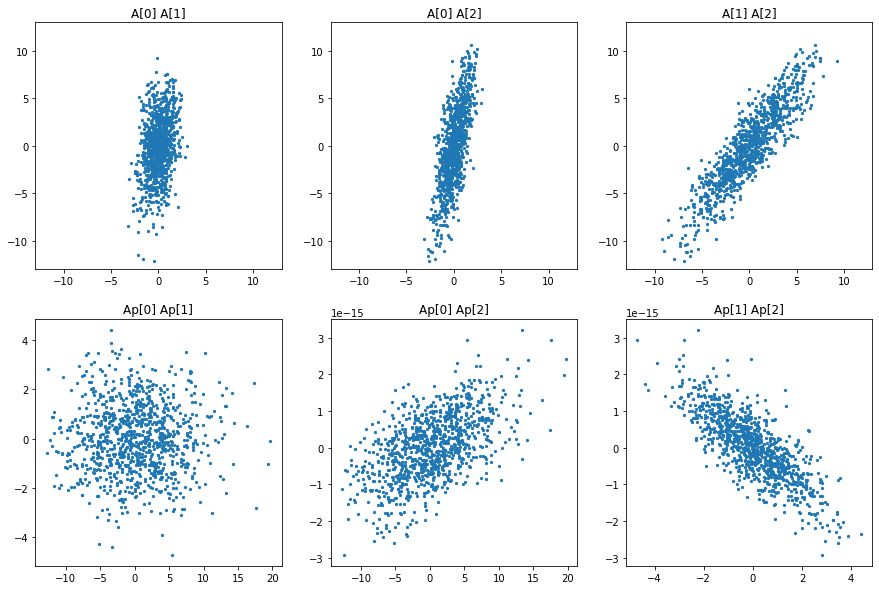

the results ar not affected because the noise add are small


In [11]:
Ap = np.dot(V.T,A)

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(15,10))
scale_factor = 1

ax1.set_title('A[0] A[1]')
ax1.axis([-13, 13, -13, 13])
ax1.scatter(A[0,:], A[1,:], s=5)

ax2.set_title('A[0] A[2]')
ax2.axis([-13, 13, -13, 13])
ax2.scatter(A[0,:], A[2,:], s=5)

ax3.set_title('A[1] A[2]')
ax3.axis([-13, 13, -13, 13])
ax3.scatter(A[1,:], A[2,:], s=5)

ax4.set_title('Ap[0] Ap[1]')
ax4.scatter(Ap[0,:], Ap[1,:], s=5)

ax5.set_title('Ap[0] Ap[2]')
ax5.scatter(Ap[0,:], Ap[2,:], s=5)

ax6.set_title('Ap[1] Ap[2]')
ax6.scatter(Ap[1,:], Ap[2,:], s=5)

plt.show()

print("the results ar not affected because the noise add are small")

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 